##  Cleaning Data with PySpark

In [1]:
# Import the pyspark.sql.types library
from pyspark.sql.types import StructType,StructField,StringType,IntegerType

# Define a new schema using the StructType method
people_schema = StructType([
  StructField('name', StringType(), False),
  StructField('age', IntegerType(), False),
  StructField('city',StringType(),False)
])

 
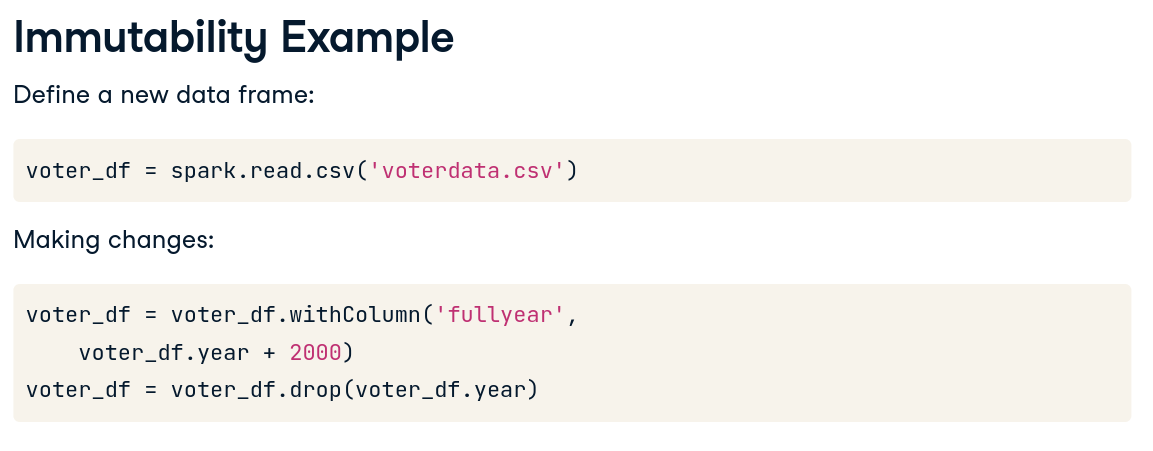

In [2]:
from pyspark.sql import SparkSession

spark=SparkSession.builder.getOrCreate()

23/10/12 21:02:12 WARN Utils: Your hostname, sergio-Lenovo-Y520-15IKBN resolves to a loopback address: 127.0.1.1; using 192.168.1.17 instead (on interface wlp3s0)
23/10/12 21:02:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 21:02:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from pyspark.sql.functions import lower
# Load the CSV file
aa_dfw_df = spark.read.format('csv').options(Header=True).load('data/AA_DFW_2017_Departures_Short.csv')

aa_dfw_df.show()


+-----------------+-------------+-------------------+-----------------------------+
|Date (MM/DD/YYYY)|Flight Number|Destination Airport|Actual elapsed time (Minutes)|
+-----------------+-------------+-------------------+-----------------------------+
|       01/01/2017|         0005|                HNL|                          537|
|       01/01/2017|         0007|                OGG|                          498|
|       01/01/2017|         0037|                SFO|                          241|
|       01/01/2017|         0043|                DTW|                          134|
|       01/01/2017|         0051|                STL|                           88|
|       01/01/2017|         0060|                MIA|                          149|
|       01/01/2017|         0071|                LAX|                          203|
|       01/01/2017|         0074|                MEM|                           76|
|       01/01/2017|         0081|                DEN|                       

In [4]:
# Add the airport column using the F.lower() method
aa_dfw_df = aa_dfw_df.withColumn('airport', lower(aa_dfw_df['Destination Airport']))

aa_dfw_df.show()


+-----------------+-------------+-------------------+-----------------------------+-------+
|Date (MM/DD/YYYY)|Flight Number|Destination Airport|Actual elapsed time (Minutes)|airport|
+-----------------+-------------+-------------------+-----------------------------+-------+
|       01/01/2017|         0005|                HNL|                          537|    hnl|
|       01/01/2017|         0007|                OGG|                          498|    ogg|
|       01/01/2017|         0037|                SFO|                          241|    sfo|
|       01/01/2017|         0043|                DTW|                          134|    dtw|
|       01/01/2017|         0051|                STL|                           88|    stl|
|       01/01/2017|         0060|                MIA|                          149|    mia|
|       01/01/2017|         0071|                LAX|                          203|    lax|
|       01/01/2017|         0074|                MEM|                           

In [5]:
# Drop the Destination Airport column
aa_dfw_df = aa_dfw_df.drop(aa_dfw_df['Destination Airport'])

# Show the DataFrame
aa_dfw_df.show()

+-----------------+-------------+-----------------------------+-------+
|Date (MM/DD/YYYY)|Flight Number|Actual elapsed time (Minutes)|airport|
+-----------------+-------------+-----------------------------+-------+
|       01/01/2017|         0005|                          537|    hnl|
|       01/01/2017|         0007|                          498|    ogg|
|       01/01/2017|         0037|                          241|    sfo|
|       01/01/2017|         0043|                          134|    dtw|
|       01/01/2017|         0051|                           88|    stl|
|       01/01/2017|         0060|                          149|    mia|
|       01/01/2017|         0071|                          203|    lax|
|       01/01/2017|         0074|                           76|    mem|
|       01/01/2017|         0081|                          123|    den|
|       01/01/2017|         0089|                          161|    slc|
|       01/01/2017|         0096|                           84| 

In [6]:
df = spark.read.format('csv').options(Header=True).load('data/AA_DFW_2016_Departures_Short.csv')

df.write.parquet("data/AA_DFW_2018.parquet")

In [7]:
df=spark.read.parquet("data/AA_DFW_2018.parquet")
df.show()

+-----------------+-------------+-------------------+-----------------------------+
|Date (MM/DD/YYYY)|Flight Number|Destination Airport|Actual elapsed time (Minutes)|
+-----------------+-------------+-------------------+-----------------------------+
|       01/01/2016|         0005|                HNL|                          529|
|       01/01/2016|         0007|                OGG|                          512|
|       01/01/2016|         0025|                PHL|                          161|
|       01/01/2016|         0037|                SFO|                          259|
|       01/01/2016|         0043|                DTW|                          157|
|       01/01/2016|         0060|                MIA|                          144|
|       01/01/2016|         0071|                LAS|                          165|
|       01/01/2016|         0079|                SLC|                          153|
|       01/01/2016|         0081|                TUS|                       

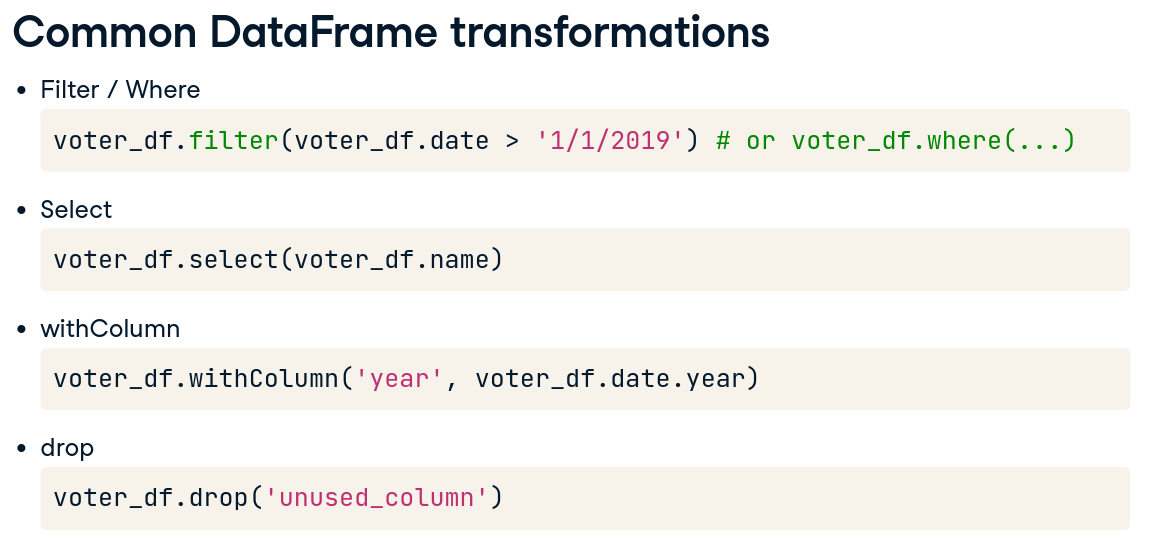

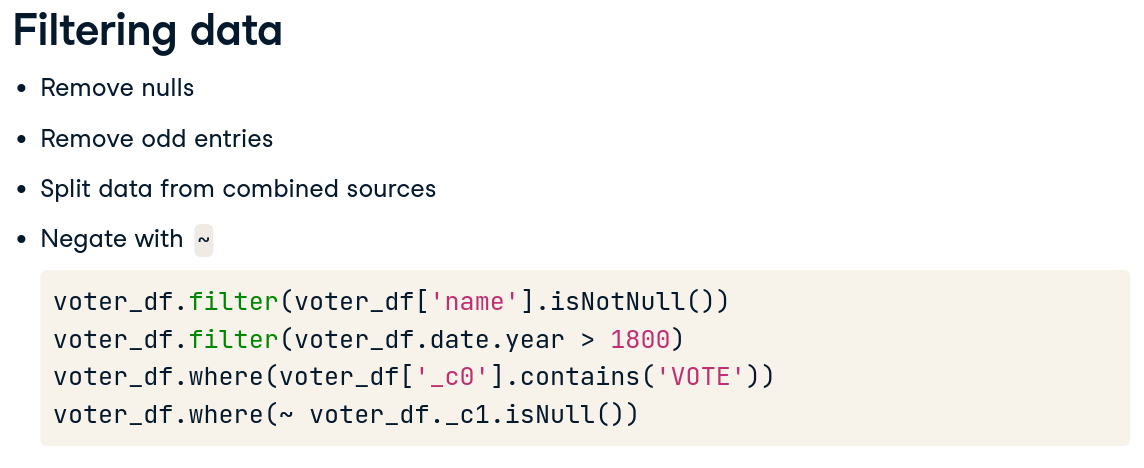

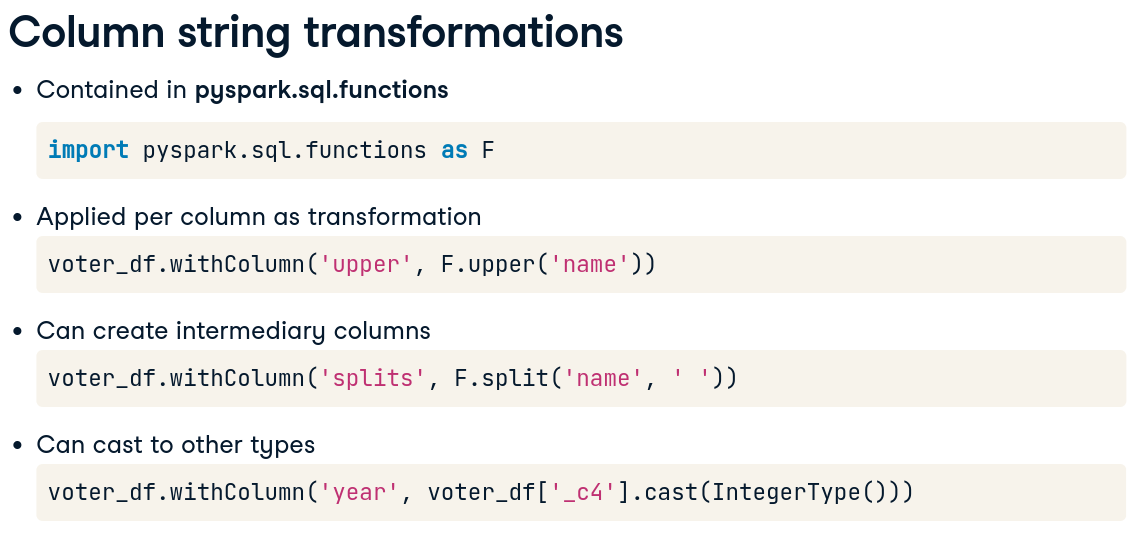

In [8]:
import pyspark.sql.functions as F
voter_df=spark.read.format("csv").options(Header=True).csv("data/DallasCouncilVoters.csv")
voter_df.show()

voter_df.createOrReplaceTempView("voter_data")

+----------+-------------+-------------------+
|      DATE|        TITLE|         VOTER_NAME|
+----------+-------------+-------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|
|02/08/2017|Councilmember|       Casey Thomas|
|02/08/2017|Councilmember|Carolyn King Arnold|
|02/08/2017|Councilmember|       Scott Griggs|
|02/08/2017|Councilmember|   B. Adam  McGough|
|02/08/2017|Councilmember|       Lee Kleinman|
|02/08/2017|Councilmember|      Sandy Greyson|
|02/08/2017|Councilmember|  Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|
|02/08/2017|Councilmember|       Casey Thomas|
|02/08/2017|Councilmember|Carolyn King Arnold|
|02/08/2017|Councilmember| Rickey D. Callahan|
|01/11/2017|Councilmember|  Jennifer S. Gates|
|04/25/2018|C

In [9]:
voter_df.select("VOTER_NAME").distinct().show(40, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|VOTER_NAME                                                                                                                                                                                                                                                                                                                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
# Filter voter_df where the VOTER_NAME is 1-20 characters in length
voter_df = voter_df.filter('length(VOTER_NAME) > 0 and length(VOTER_NAME) < 20')

# Filter out voter_df where the VOTER_NAME contains an underscore
voter_df = voter_df.filter(~ F.col('VOTER_NAME').contains("_"))

In [11]:
voter_df.select("VOTER_NAME").distinct().show(40, truncate=False)

+-------------------+
|VOTER_NAME         |
+-------------------+
|Tennell Atkins     |
|Scott Griggs       |
|Scott  Griggs      |
|Sandy Greyson      |
|Michael S. Rawlings|
|Kevin Felder       |
|Adam Medrano       |
|Casey  Thomas      |
|Mark  Clayton      |
|Casey Thomas       |
|Sandy  Greyson     |
|Mark Clayton       |
|Jennifer S.  Gates |
|Tiffinni A. Young  |
|B. Adam  McGough   |
|Omar Narvaez       |
|Philip T. Kingston |
|Rickey D. Callahan |
|Dwaine R. Caraway  |
|Philip T.  Kingston|
|Jennifer S. Gates  |
|Lee M. Kleinman    |
|Monica R. Alonzo   |
|Rickey D.  Callahan|
|Carolyn King Arnold|
|Erik Wilson        |
|Lee Kleinman       |
+-------------------+



In [12]:
# Add a new column called splits separated on whitespace
voter_df = voter_df.withColumn("splits", F.split(voter_df.VOTER_NAME, '\s+'))
voter_df.show()

+----------+-------------+-------------------+--------------------+
|      DATE|        TITLE|         VOTER_NAME|              splits|
+----------+-------------+-------------------+--------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|[Jennifer, S., Ga...|
|02/08/2017|Councilmember| Philip T. Kingston|[Philip, T., King...|
|02/08/2017|        Mayor|Michael S. Rawlings|[Michael, S., Raw...|
|02/08/2017|Councilmember|       Adam Medrano|     [Adam, Medrano]|
|02/08/2017|Councilmember|       Casey Thomas|     [Casey, Thomas]|
|02/08/2017|Councilmember|Carolyn King Arnold|[Carolyn, King, A...|
|02/08/2017|Councilmember|       Scott Griggs|     [Scott, Griggs]|
|02/08/2017|Councilmember|   B. Adam  McGough| [B., Adam, McGough]|
|02/08/2017|Councilmember|       Lee Kleinman|     [Lee, Kleinman]|
|02/08/2017|Councilmember|      Sandy Greyson|    [Sandy, Greyson]|
|02/08/2017|Councilmember|  Jennifer S. Gates|[Jennifer, S., Ga...|
|02/08/2017|Councilmember| Philip T. Kingston|[P

In [13]:
# Create a new column called first_name based on the first item in splits
voter_df = voter_df.withColumn("first_name", voter_df.splits.getItem(0))

# Get the last entry of the splits list and create a column called last_name
voter_df = voter_df.withColumn("last_name", voter_df.splits.getItem(F.size('splits') - 1))

/home/sergio/anaconda3/envs/datasc/lib/python3.9/site-packages/pyspark/sql/column.py:460: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


In [14]:
voter_df.show()

+----------+-------------+-------------------+--------------------+----------+---------+
|      DATE|        TITLE|         VOTER_NAME|              splits|first_name|last_name|
+----------+-------------+-------------------+--------------------+----------+---------+
|02/08/2017|Councilmember|  Jennifer S. Gates|[Jennifer, S., Ga...|  Jennifer|    Gates|
|02/08/2017|Councilmember| Philip T. Kingston|[Philip, T., King...|    Philip| Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|[Michael, S., Raw...|   Michael| Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|     [Adam, Medrano]|      Adam|  Medrano|
|02/08/2017|Councilmember|       Casey Thomas|     [Casey, Thomas]|     Casey|   Thomas|
|02/08/2017|Councilmember|Carolyn King Arnold|[Carolyn, King, A...|   Carolyn|   Arnold|
|02/08/2017|Councilmember|       Scott Griggs|     [Scott, Griggs]|     Scott|   Griggs|
|02/08/2017|Councilmember|   B. Adam  McGough| [B., Adam, McGough]|        B.|  McGough|
|02/08/2017|Councilme

In [15]:
# Drop the splits column
voter_df = voter_df.drop('splits')

# Show the voter_df DataFrame
voter_df.show()

+----------+-------------+-------------------+----------+---------+
|      DATE|        TITLE|         VOTER_NAME|first_name|last_name|
+----------+-------------+-------------------+----------+---------+
|02/08/2017|Councilmember|  Jennifer S. Gates|  Jennifer|    Gates|
|02/08/2017|Councilmember| Philip T. Kingston|    Philip| Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|   Michael| Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|      Adam|  Medrano|
|02/08/2017|Councilmember|       Casey Thomas|     Casey|   Thomas|
|02/08/2017|Councilmember|Carolyn King Arnold|   Carolyn|   Arnold|
|02/08/2017|Councilmember|       Scott Griggs|     Scott|   Griggs|
|02/08/2017|Councilmember|   B. Adam  McGough|        B.|  McGough|
|02/08/2017|Councilmember|       Lee Kleinman|       Lee| Kleinman|
|02/08/2017|Councilmember|      Sandy Greyson|     Sandy|  Greyson|
|02/08/2017|Councilmember|  Jennifer S. Gates|  Jennifer|    Gates|
|02/08/2017|Councilmember| Philip T. Kingston|  

## Conditional DataFrame column operations

when condition

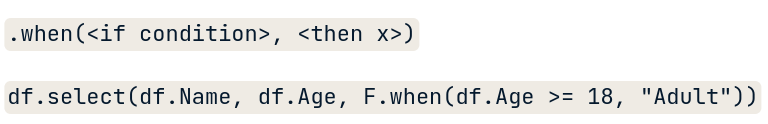

otherwise condition 

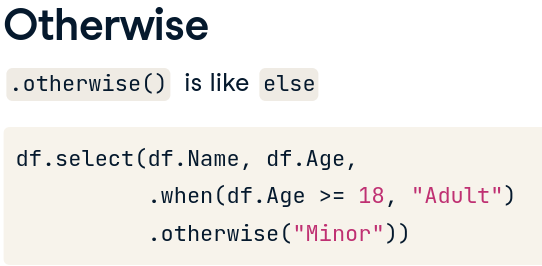

In [16]:
from pyspark.sql.functions import when
# Add a column to voter_df for any voter with the title **Councilmember**
voter_df = voter_df.withColumn('random_val',
                               when(voter_df.TITLE=="Councilmember",F.rand()))

# Show some of the DataFrame rows, noting whether the when clause worked
voter_df.show()

+----------+-------------+-------------------+----------+---------+--------------------+
|      DATE|        TITLE|         VOTER_NAME|first_name|last_name|          random_val|
+----------+-------------+-------------------+----------+---------+--------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|  Jennifer|    Gates|  0.5787503753968695|
|02/08/2017|Councilmember| Philip T. Kingston|    Philip| Kingston| 0.44947573127497364|
|02/08/2017|        Mayor|Michael S. Rawlings|   Michael| Rawlings|                NULL|
|02/08/2017|Councilmember|       Adam Medrano|      Adam|  Medrano| 0.15475501109046064|
|02/08/2017|Councilmember|       Casey Thomas|     Casey|   Thomas|  0.3795312775674492|
|02/08/2017|Councilmember|Carolyn King Arnold|   Carolyn|   Arnold|  0.7276621895092237|
|02/08/2017|Councilmember|       Scott Griggs|     Scott|   Griggs|  0.2749361514724601|
|02/08/2017|Councilmember|   B. Adam  McGough|        B.|  McGough| 0.24446501211741856|
|02/08/2017|Councilme

In [17]:
# Add a column to voter_df for a voter based on their position
voter_df = voter_df.withColumn('random_val',
                               when(voter_df.TITLE == 'Councilmember', F.rand())
                               .when(voter_df.TITLE == 'Mayor', 2)
                               .otherwise(0))

# Show some of the DataFrame rows
voter_df.show()



+----------+-------------+-------------------+----------+---------+--------------------+
|      DATE|        TITLE|         VOTER_NAME|first_name|last_name|          random_val|
+----------+-------------+-------------------+----------+---------+--------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|  Jennifer|    Gates|  0.7952809296307485|
|02/08/2017|Councilmember| Philip T. Kingston|    Philip| Kingston| 0.11807989474046954|
|02/08/2017|        Mayor|Michael S. Rawlings|   Michael| Rawlings|                 2.0|
|02/08/2017|Councilmember|       Adam Medrano|      Adam|  Medrano|   0.433243563446539|
|02/08/2017|Councilmember|       Casey Thomas|     Casey|   Thomas|  0.7914815469949525|
|02/08/2017|Councilmember|Carolyn King Arnold|   Carolyn|   Arnold|  0.1676464807006356|
|02/08/2017|Councilmember|       Scott Griggs|     Scott|   Griggs|  0.9962578356656193|
|02/08/2017|Councilmember|   B. Adam  McGough|        B.|  McGough|  0.5779386458265171|
|02/08/2017|Councilme

In [18]:
# Use the .filter() clause with random_val
voter_df.filter(voter_df.random_val==0).show()

+----------+--------------------+-----------------+----------+---------+----------+
|      DATE|               TITLE|       VOTER_NAME|first_name|last_name|random_val|
+----------+--------------------+-----------------+----------+---------+----------+
|04/25/2018|Deputy Mayor Pro Tem|     Adam Medrano|      Adam|  Medrano|       0.0|
|04/25/2018|       Mayor Pro Tem|Dwaine R. Caraway|    Dwaine|  Caraway|       0.0|
|06/20/2018|Deputy Mayor Pro Tem|     Adam Medrano|      Adam|  Medrano|       0.0|
|06/20/2018|       Mayor Pro Tem|Dwaine R. Caraway|    Dwaine|  Caraway|       0.0|
|06/20/2018|Deputy Mayor Pro Tem|     Adam Medrano|      Adam|  Medrano|       0.0|
|06/20/2018|       Mayor Pro Tem|Dwaine R. Caraway|    Dwaine|  Caraway|       0.0|
|08/15/2018|Deputy Mayor Pro Tem|     Adam Medrano|      Adam|  Medrano|       0.0|
|08/15/2018|Deputy Mayor Pro Tem|     Adam Medrano|      Adam|  Medrano|       0.0|
|09/18/2018|Deputy Mayor Pro Tem|     Adam Medrano|      Adam|  Medrano|    

## User defined functions

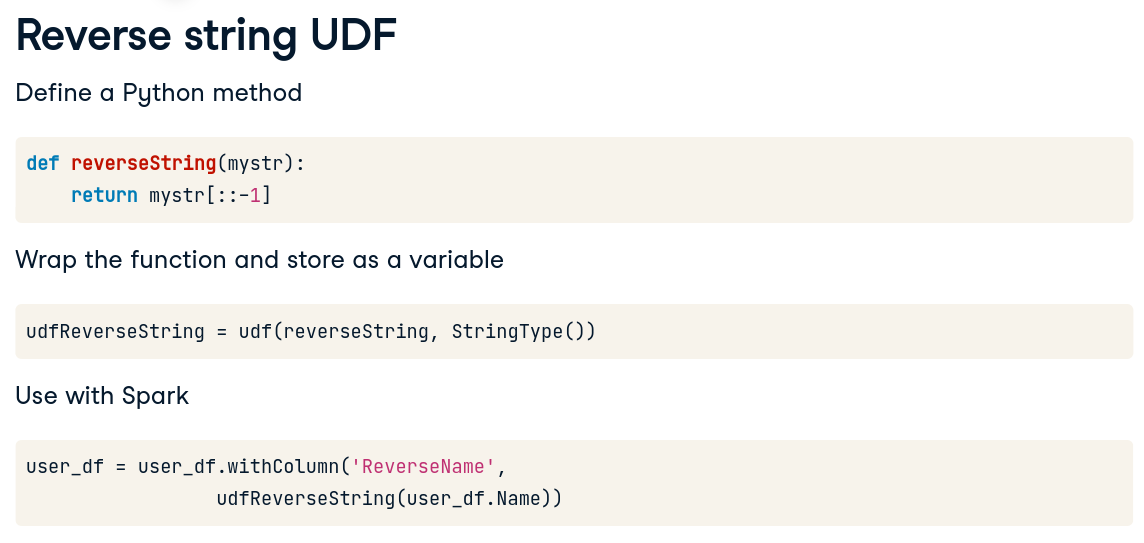

In [19]:
voter_df = voter_df.withColumn("splits", F.split(voter_df.VOTER_NAME, '\s+'))
def getFirstAndMiddle(names):
  # Return a space separated string of names
  return ' '.join(names)

# Define the method as a UDF
udfFirstAndMiddle = F.udf(getFirstAndMiddle, StringType())

# Create a new column using your UDF
voter_df = voter_df.withColumn('first_and_middle_name', udfFirstAndMiddle(voter_df.splits))

# Show the DataFrame
voter_df.show()

+----------+-------------+-------------------+----------+---------+--------------------+--------------------+---------------------+
|      DATE|        TITLE|         VOTER_NAME|first_name|last_name|          random_val|              splits|first_and_middle_name|
+----------+-------------+-------------------+----------+---------+--------------------+--------------------+---------------------+
|02/08/2017|Councilmember|  Jennifer S. Gates|  Jennifer|    Gates|  0.7952809296307485|[Jennifer, S., Ga...|    Jennifer S. Gates|
|02/08/2017|Councilmember| Philip T. Kingston|    Philip| Kingston| 0.11807989474046954|[Philip, T., King...|   Philip T. Kingston|
|02/08/2017|        Mayor|Michael S. Rawlings|   Michael| Rawlings|                 2.0|[Michael, S., Raw...|  Michael S. Rawlings|
|02/08/2017|Councilmember|       Adam Medrano|      Adam|  Medrano|   0.433243563446539|     [Adam, Medrano]|         Adam Medrano|
|02/08/2017|Councilmember|       Casey Thomas|     Casey|   Thomas|  0.79148

In [20]:

# Select all the unique council voters
voter_df_ = voter_df.select(voter_df["VOTER_NAME"]).distinct()
# Count the rows in voter_df
print("\nThere are %d rows in the voter_df DataFrame.\n" % voter_df_.count())

# Add a ROW_ID
voter_df_ = voter_df_.withColumn('ROW_ID', F.monotonically_increasing_id())

# Show the rows with 10 highest IDs in the set
voter_df_.orderBy(voter_df_.ROW_ID.desc()).show(10)


There are 27 rows in the voter_df DataFrame.

+-------------------+------+
|         VOTER_NAME|ROW_ID|
+-------------------+------+
|       Lee Kleinman|    26|
|        Erik Wilson|    25|
|Carolyn King Arnold|    24|
|Rickey D.  Callahan|    23|
|   Monica R. Alonzo|    22|
|    Lee M. Kleinman|    21|
|  Jennifer S. Gates|    20|
|Philip T.  Kingston|    19|
|  Dwaine R. Caraway|    18|
| Rickey D. Callahan|    17|
+-------------------+------+
only showing top 10 rows



In [21]:
print("\nThere are %d partitions in the voter_df DataFrame.\n" % voter_df.rdd.getNumPartitions())


There are 1 partitions in the voter_df DataFrame.



## Caching
store Dataframes in memory or in disk, this is useful because reduce the resource usage, in other hand ccahing Dataframe meke more perfoformance


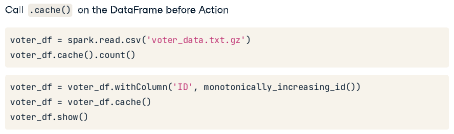

In [22]:
departures_df=spark.read.format("csv").options(Header=True).csv("data/AA_DFW_2014_Departures_Short.csv")

import time
start_time = time.time()

# Add caching to the unique rows in departures_df
departures_df = departures_df.distinct().cache()

# Count the unique rows in departures_df, noting how long the operation takes
print("Counting %d rows took %f seconds" % (departures_df.count(), time.time() - start_time))

# Count the rows again, noting the variance in time of a cached DataFrame
start_time = time.time()
print("Counting %d rows again took %f seconds" % (departures_df.count(), time.time() - start_time))


Counting 157198 rows took 1.590092 seconds
Counting 157198 rows again took 0.160457 seconds


In [23]:
# Determine if departures_df is in the cache
print("Is departures_df cached?: %s" % departures_df.is_cached)
print("Removing departures_df from cache")

# Remove departures_df from the cache
departures_df.unpersist()

# Check the cache status again
print("Is departures_df cached?: %s" % departures_df.is_cached)

Is departures_df cached?: True
Removing departures_df from cache
Is departures_df cached?: False


## Introduction to data pipelines

In [28]:
# Import the data to a DataFrame
departures_df = spark.read.csv("data/AA_DFW_2015_Departures_Short.csv", header=True)

# Remove any duration of 0
departures_df = departures_df.filter(departures_df[3]>0)

# Add an ID column
departures_df = departures_df.withColumn('id', F.monotonically_increasing_id())

# Write the file out to JSON format
departures_df.write.json("output.json", mode='overwrite')

In [33]:
from pyspark.sql.functions import col
# Import the file to a DataFrame and perform a row count
annotations_df = spark.read.csv("data/AA_DFW_2015_Departures_Short.csv", sep="|")
full_count = annotations_df.count()

# Count the number of rows beginning with '#'
comment_count = annotations_df.where(col('_c0').startswith('#')).count()

# Import the file to a new DataFrame, without commented rows
no_comments_df = spark.read.csv("data/AA_DFW_2015_Departures_Short.csv", sep="|", comment='#')

# Count the new DataFrame and verify the difference is as expected
no_comments_count = no_comments_df.count()
print("Full count: %d\nComment count: %d\nRemaining count: %d" % (full_count, comment_count, no_comments_count))

Full count: 146559
Comment count: 0
Remaining count: 146559
